In [2]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'chest-xray-pneumonia:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F17810%2F23812%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240906%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240906T204029Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D323bc56283fe43c13030b2edfc16e1277a40940620462ca18168ce109b170fd2b63d6ba0533dac73ddd5a3d2483ebd8dc08ab76d0fccaf86715a4c33bcb3bd7b14f4a8b522f1889b557630bfc31bfbd97f4dfd04c32503a561e37a4e99c296cf20e08f72195d57b82ca7b0a9e346d75bad504a0930c5ad7c9d4843d62ee0ffb2770dc1fa5c574453dd2a59ed3f28db157eb3e1953fbf000115f5669e3bbedd759359322d3db4dc3e83d02160bcef329e3ce249ebde86aa1c379ff63bfb877ad8093985f50927a5e768931acb07f91e61b2217d4ff27b9fc23a97591bc08da306f6bbd912692fafdb949836494b2161022cccb12be84dc5d1bef39aa1f4d44b44'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2463365435 bytes downloaded
Downloaded and uncompressed: chest-xray-pneumonia
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [ ]:
!pip install tensorflow numpy pandas matplotlib scikit-learn

In [ ]:
# import the needed pacages for the training
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

In [ ]:
# paths to the data sets
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
val_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'
test_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'

In [ ]:
# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [ ]:
# scale the images
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Load images from train images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.


In [ ]:
# get the valdation images
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 16 images belonging to 2 classes.


In [ ]:
# get the testing images loaded in to the system'
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [ ]:
# Load VGG16 without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# layers for fine-tuning
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)


In [ ]:
#  final model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=2,
    verbose=1
)

Epoch 1/2
163/163 ━━━━━━━━━━━━━━━━━━━━ 1574s 10s/step - accuracy: 0.9265 - loss: 0.1841 - val_accuracy: 0.7500 - val_loss: 0.5609
Epoch 2/2
163/163 ━━━━━━━━━━━━━━━━━━━━ 1562s 10s/step - accuracy: 0.9326 - loss: 0.1632 - val_accuracy: 0.7500 - val_loss: 0.6146


**InceptionNet Implementation:**

- This function returns a Keras image classification model, optionally loaded with weights pre-trained on ImageNet.

In [ ]:
base_model_inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model_inceptionv3.layers:
    layer.trainable = False


# layers for fine-tuning
x = base_model_inceptionv3.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)


#  final model inception
model_inception = Model(inputs=base_model_inceptionv3.input, outputs=predictions)

# Compile the model
model_inception.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_inception = model_inception.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    verbose=1
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 374s 2s/step - accuracy: 0.7914 - loss: 0.7748 - val_accuracy: 0.8125 - val_loss: 0.2896
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.9215 - loss: 0.2092 - val_accuracy: 0.6250 - val_loss: 0.6868
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 359s 2s/step - accuracy: 0.9269 - loss: 0.1868 - val_accuracy: 0.8125 - val_loss: 0.3279
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.9363 - loss: 0.1586 - val_accuracy: 0.6875 - val_loss: 0.5545
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 358s 2s/step - accuracy: 0.9294 - loss: 0.1754 - val_accuracy: 0.8750 - val_loss: 0.2328
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 379s 2s/step - accuracy: 0.9355 - loss: 0.1587 - val_accuracy: 0.9375 - val_loss: 0.2257
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 360s 2s/step - accuracy: 0.9378 - loss: 0.1611 - val_accuracy: 0.7500 - val_loss: 0.4692
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 383s 2

**EfficientNet Implementation:**

- This function returns a Keras image classification model, optionally loaded with weights pre-trained on ImageNet.


In [ ]:
# Load EfficientNet without the top layers
base_model_efficientNet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False


# layers for fine-tuning
x = base_model_efficientNet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

#  final model
model_efficientNet = Model(inputs=base_model_efficientNet.input, outputs=predictions)

# Compile the model
model_efficientNet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_efficientNet = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=4,
    verbose=1
)

Epoch 1/4
163/163 ━━━━━━━━━━━━━━━━━━━━ 1565s 10s/step - accuracy: 0.9453 - loss: 0.1459 - val_accuracy: 0.7500 - val_loss: 0.4164
Epoch 2/4
163/163 ━━━━━━━━━━━━━━━━━━━━ 1558s 10s/step - accuracy: 0.9504 - loss: 0.1355 - val_accuracy: 0.7500 - val_loss: 0.4095
Epoch 3/4
163/163 ━━━━━━━━━━━━━━━━━━━━ 1559s 10s/step - accuracy: 0.9448 - loss: 0.1378 - val_accuracy: 0.7500 - val_loss: 0.4644
Epoch 4/4
163/163 ━━━━━━━━━━━━━━━━━━━━ 1563s 10s/step - accuracy: 0.9514 - loss: 0.1338 - val_accuracy: 0.7500 - val_loss: 0.5163


**Model Evaluation**


**Evaluate on Test Set:**

- The models will be evaluated in the follwoing order
 - Vgg16
 - InceptionNet
 - EfficientNet

In [ ]:
# Evaluating he Vgg16 Model first

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy VGG16 Mode:  {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 182s 9s/step - accuracy: 0.8992 - loss: 0.3001
Test Accuracy VGG16 Mode:  0.8878, Test Loss: 0.3345


In [ ]:
# Evaluating the InceptionNet
test_loss, test_accuracy = model_inception.evaluate(test_generator)
print(f"Test Accuracy InceptionNet Model: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8260 - loss: 0.3796
Test Accuracy InceptionNet Model: 0.8381, Test Loss: 0.3812


In [ ]:
# Evaluating the EfficientNet
test_loss, test_accuracy = model_efficientNet.evaluate(test_generator)
print(f"Test Accuracy EfficientNet Model: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6194 - loss: 0.6899
Test Accuracy EfficientNet Model: 0.6250, Test Loss: 0.6897


**Detailed Performance Metrics**


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


**VGG16 first**

In [ ]:
# Predict on test data Vgg16
test_preds = model.predict(test_generator)
test_preds = (test_preds > 0.5).astype(int)

# Get true labels
true_labels = test_generator.classes

# Classification report
print(classification_report(true_labels, test_preds, target_names=['Normal', 'Pneumonia']))


20/20 ━━━━━━━━━━━━━━━━━━━━ 182s 9s/step
              precision    recall  f1-score   support

      Normal       0.38      0.29      0.33       234
   Pneumonia       0.63      0.72      0.67       390

    accuracy                           0.55       624
   macro avg       0.50      0.50      0.50       624
weighted avg       0.53      0.55      0.54       624



**InceptionNet**

In [ ]:
# Predict on test data InceptionNet

test_preds = model_inception.predict(test_generator)
test_preds = (test_preds > 0.5).astype(int)

# Get true labels
true_labels = test_generator.classes

# Classification report
print(classification_report(true_labels, test_preds, target_names=['Normal', 'Pneumonia']))


20/20 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step
              precision    recall  f1-score   support

      Normal       0.38      0.28      0.32       234
   Pneumonia       0.63      0.72      0.67       390

    accuracy                           0.56       624
   macro avg       0.50      0.50      0.50       624
weighted avg       0.53      0.56      0.54       624



**EfficientNet**

In [ ]:
# Predict on test data EfficientNet
test_preds = model_efficientNet.predict(test_generator)
test_preds = (test_preds > 0.5).astype(int)

# Get true labels
true_labels = test_generator.classes

# Classification report
print(classification_report(true_labels, test_preds, target_names=['Normal', 'Pneumonia']))


20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00       234
   Pneumonia       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 **Results Visualization**

 Here i will be able to visualize the Plotting Training History of each model starting with

 - Vgg16
 - InceptionNet
 - EfficientNet


 1. VGG16

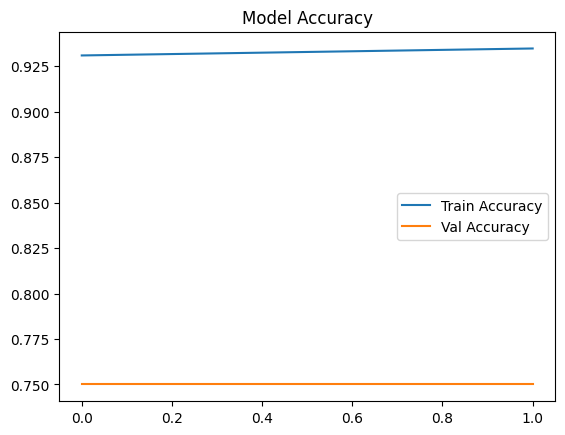

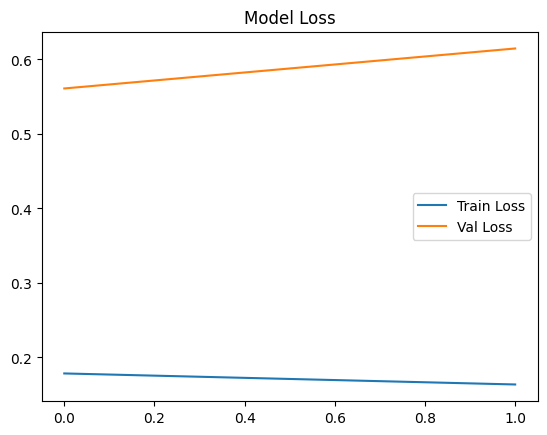

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

2. InceptionNet

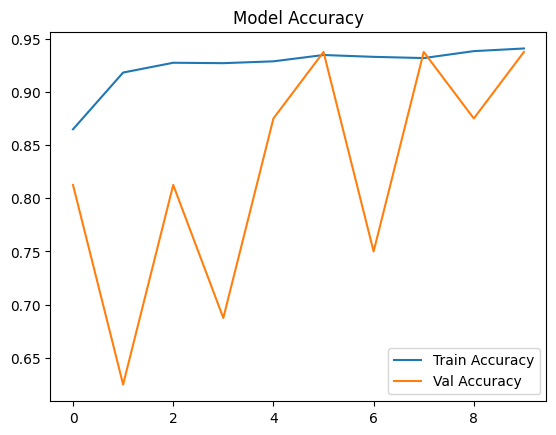

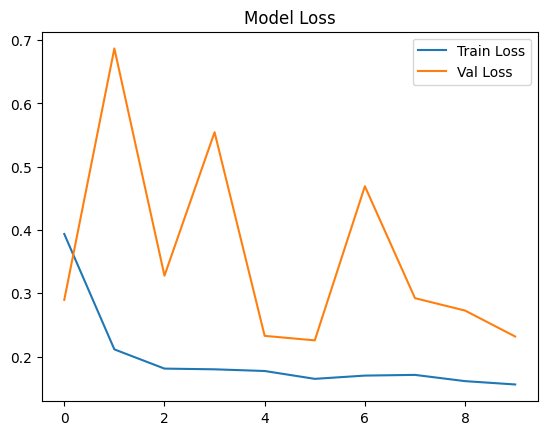

In [ ]:
# Plot accuracy
plt.plot(history_inception.history['accuracy'], label='Train Accuracy')
plt.plot(history_inception.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history_inception.history['loss'], label='Train Loss')
plt.plot(history_inception.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

3 - EfficientNet

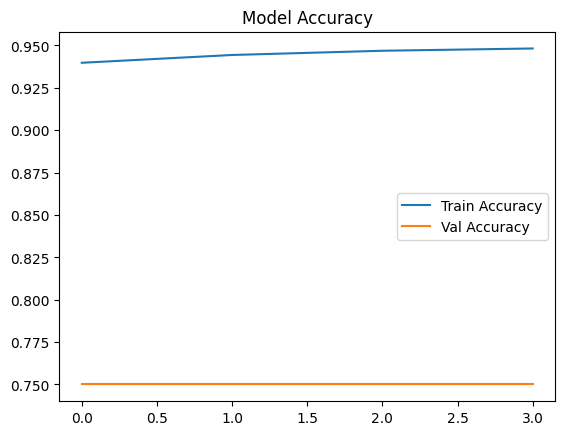

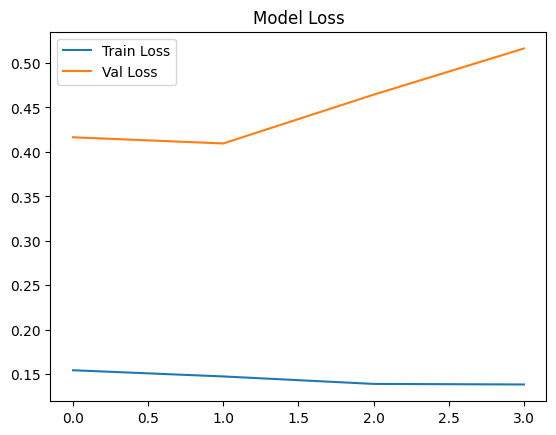

In [ ]:
# Plot accuracy
plt.plot(history_efficientNet.history['accuracy'], label='Train Accuracy')
plt.plot(history_efficientNet.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history_efficientNet.history['loss'], label='Train Loss')
plt.plot(history_efficientNet.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.show()